### DATA SCIENCE FELLOWSHIP PRORAM - NATURAL DISASTERS DATASET 
### Oyekemi Abioye

#### This notebook contains the following;

1. Exploratory Analysis
2. Data Preprocessing
3. Feature Generation
4. Task 1 - 4
5. Findings & Recommendations

Before analysing, classifying and transforming data I loaded it. 
To understand the following about the data: 

* what format is it in? 
* wehat recognisable features does it have?

I used Python,spaCy, and nltk libraries to load, explore and manipulate the textual data.

## Loading the data

The dataset (https://www.kaggle.com/competitions/nlp-getting-started/data) contains $7613$ training and $3263$ test data of text from tweets, keywords, and tweets location origins.

The `natural_disaster_data` also contains the target column connoting if a tweet is about a real disaster or not i.e `zeros` & `ones`.

In [2]:
#importing libararies 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
#loading the train & test data
train = pd.read_csv("data/train.csv")

In [4]:
test = pd.read_csv("data/test.csv")

In [5]:
#creating copies of both datasets to preserve original data
train_data = train.copy()

In [6]:
test_data = test.copy()

## Preprocessing

The text data loaded, comes as a single sequence of symbols (a string of characters) for each tweet(id).

The first step is to conduct brief exploratory analysis to foster an in-depth understanding of the data.

### Then
1. Removal of URLs, emails & HTML tags
2. Removal of special characters
3. Removal of numeric values
4. Removal of hashtags and handles
5. Lemmatization
6. Capitalization
7. Removing Stopwords & Punctuations

## Exploratory Analysis

#### Using `.info()`
allows us to understand more about the dataset; how many
values there are, and what might be missing.
It also tells us about dtypes; these are the pandas data types for each column
as interpreted by pandas when reading the CSV file

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


#### The `.shape`
attribute gives the number of rows and columns it contains

In [8]:
print(train_data.shape[0])
print(train_data.shape[1])

7613
5


In [9]:
print(f'Number of training examples: {train_data.shape[0]}')

print('\n===\n')

print(train_data.head())

print('\n===\n')

print(f'Total number of keywords: {len(train_data.keyword.unique())}')

print('\n===\n')

print(f'Examples per keywords:\n\n{train_data.keyword.value_counts()}')

print('\n===\n')

print(f'Total number of location: {len(train_data.location.unique())}')

print('\n===\n')

print(f'Examples per location:\n\n{train_data.location.value_counts()}')

Number of training examples: 7613

===

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

===

Total number of keywords: 222

===

Examples per keywords:

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

===

Tota

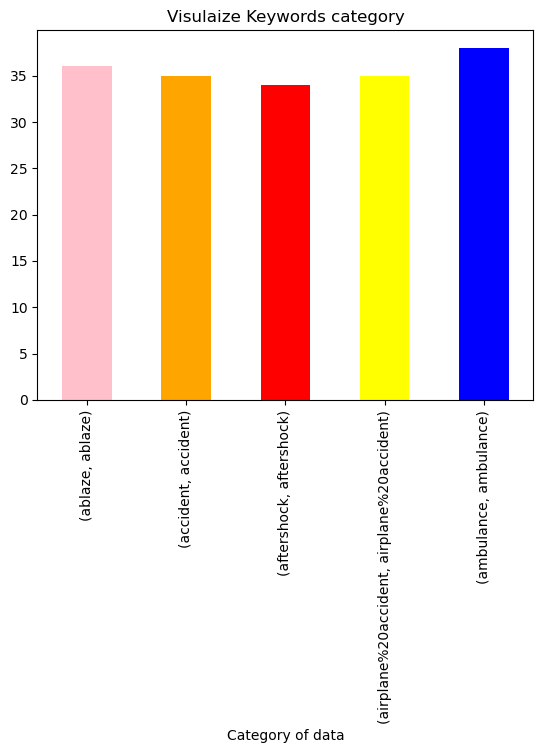

In [10]:
#Diaplaying distribution of the keywords
train_data.groupby('keyword').keyword.value_counts().head().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize Keywords category")
plt.show()

<AxesSubplot:>

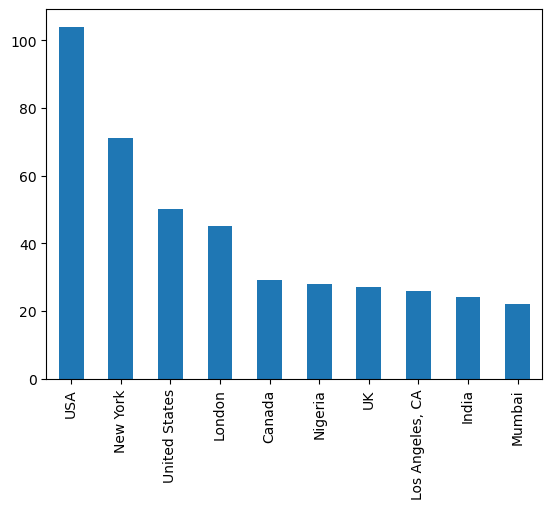

In [11]:
train_data['location'].value_counts().head(10).plot(kind = 'bar')

This signifies the following;
Keyword - `fatalities` is the most occuring event with `radiation emergency` as the least.
Location - Majority of the tweets originate from `USA`.
It also shows a need to apply preprocessing to both the `Keyword` & `location` columns 

checking the distribution of the `target` column

In [12]:
#determining the class/target distribution to check for imbalanced data.
train_data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

<AxesSubplot:>

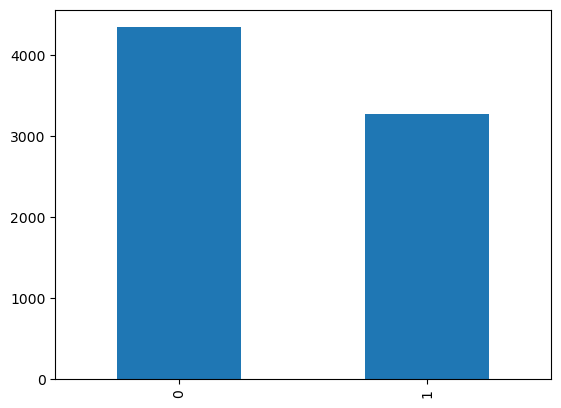

In [13]:
train_data['target'].value_counts().plot(kind = 'bar')

**The classes appears well balanced.**

checking the tweets hashtags to view the common topics

In [14]:
def hashtag(text):
    text = text.split()
    hashtags = [t for t in text if t.startswith('#')]
    #df = pd.DataFrame(hashtags, columns=['values'])
    #res = df['values'].value_counts().to_frame().reset_index().sort_values('index')
    return hashtags
df = train_data['text'].apply(hashtag)

<AxesSubplot:>

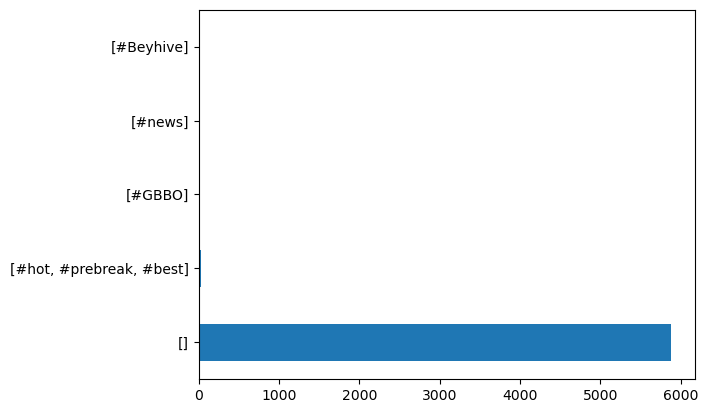

In [58]:
df.value_counts().head().plot(kind = 'barh')

## TASK 1

### Preprocessing

Removal of URLs, emails & HTML tags 

In [16]:
def remove_tags(text):
    text = re.sub(r'((?:https?|ftp|file)://[-\w\d+=&@#/%?~|!:;\.,]*)', '', text)
    text = re.sub(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\\.[a-zA-Z0-9-.]+)', '', text)
    text = re.sub(r'<.*?>', '', text)
    return text

train_data['clean_text'] = train_data['text'].apply(remove_tags)
test_data['clean_text'] = test_data['text'].apply(remove_tags)



Removal of special characters

In [17]:
import string

def remove_Specialcharacters(text):
    text = re.sub(r'(\d\.\d)|[^\s\w]', '', text)
    text = re.sub(r'\w*\d\w*', '', text).strip()
    text = re.sub(r'^\û', '', text)
    text = ''.join([word for word in text if word in string.printable])
    return text

train_data['clean_text'] = train_data['clean_text'].apply(remove_Specialcharacters)
test_data['clean_text'] = test_data['clean_text'].apply(remove_Specialcharacters)

Removal of numeric values

In [18]:
def remove_numbers(text):
    text = re.sub(r'\b\d+\b', '', text)
    return text

train_data['clean_text'] = train_data['clean_text'].apply(remove_numbers)
test_data['clean_text'] = test_data['clean_text'].apply(remove_numbers)


Removal of  hashtags and handles

In [19]:
def remove_hastags_handles(text):
    text = re.sub(r'@[\w]+','', text)
    text = re.sub(r'#[\w]+','', text)
    return text

train_data['clean_text'] = train_data['clean_text'].apply(remove_hastags_handles)
test_data['clean_text'] = test_data['clean_text'].apply(remove_hastags_handles)


In [86]:
#loading the spaCy and nltk libraries
import spacy
import nltk
nlp = spacy.load('en_core_web_md')

Lemmatisation to convert different word forms to their base representations (lemmas) by looking up whether the lemma is in the vocabulary of the language in question

In [21]:
def Lemmatisation(text):
    text = nlp(text)
    lemmas = [token.lemma_ for token in text]
    return lemmas

train_data['clean_text'] = train_data['clean_text'].apply(Lemmatisation)
test_data['clean_text'] = test_data['clean_text'].apply(Lemmatisation)

Capitalisation - converting string to lowercase

In [22]:
def capitalisation(text):
    text = [x.lower() for x in text]
    return text

train_data['clean_text'] = train_data['clean_text'].apply(capitalisation)
test_data['clean_text'] = test_data['clean_text'].apply(capitalisation)

Removing Stopwords

In [23]:
def remove_stopwords(text):
    stopwords = nlp.Defaults.stop_words
    removed_stopwords = ' '.join([token for token in text if token not in stopwords])
    return removed_stopwords

train_data['clean_text'] = train_data['clean_text'].apply(remove_stopwords)
test_data['clean_text'] = test_data['clean_text'].apply(remove_stopwords)

In [24]:
def remove_punctuation(text):
    punct = string.punctuation
    removed_punctuations = ''.join([token for token in text if token not in punct])
    return removed_punctuations

train_data['clean_text'] = train_data['clean_text'].apply(remove_punctuation)
test_data['clean_text'] = test_data['clean_text'].apply(remove_punctuation)

Displaying cleaned data showing comparison with the raw data

In [25]:
train_data[['id', 'text', 'clean_text']].head()

,id,text,clean_text
0,1,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive
1,4,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,resident ask shelter place notify officer evac...
3,6,"13,000 people receive #wildfires evacuation or...",people receive wildfire evacuation order calif...
4,7,Just got sent this photo from Ruby #Alaska as ...,got send photo ruby alaska smoke wildfires pou...


creating a word cloud to highlight frequent words; Disaster Vs Not-Disaster tweet

In [26]:
from wordcloud import WordCloud

random_state = 1000

non_disaster = [''.join(t) for t in train_data[train_data['target']==0]['clean_text']]
non_disaster = ' '.join(map(str, non_disaster))
disaster = [''.join(t) for t in train_data[train_data['target']==1]['clean_text']]
disaster = ' '.join(map(str, disaster))

#creating the wordcloud
non_disaster = WordCloud(width=800, height=400, max_words=500, background_color='white', random_state=random_state).generate(non_disaster)
disaster = WordCloud(width=800, height=400, max_words=500, random_state=random_state).generate(disaster)

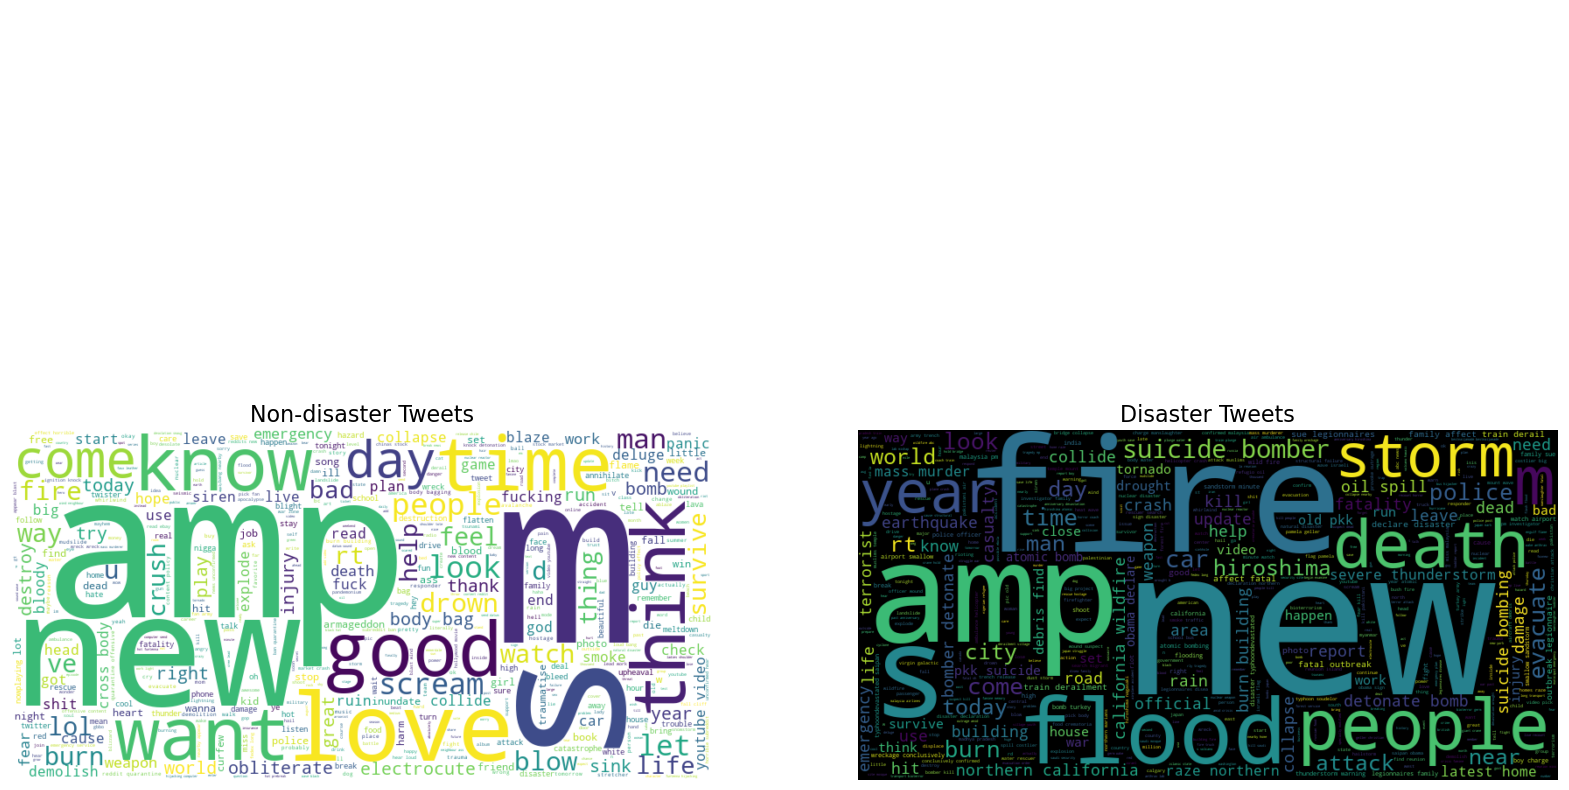

In [27]:
# create subplots for the generated clouds
fig, axes = plt.subplots(2, 2, figsize = (20,10))
axes[1,0].imshow(non_disaster, interpolation='bilinear')
axes[1,1].imshow(disaster, interpolation='bilinear')
[ax.axis('off') for ax in axes.ravel()]
axes[1,0].set_title('Non-disaster Tweets', fontsize=16)
axes[1,1].set_title('Disaster Tweets', fontsize=16)

plt.show()

### Bag of words model

generating bag of words helps to transform the text data to something more amenable to modelling mathematically.

The `sklearn.feature_extraction.text` contains useful classes for this. The first value of each vector is the count of the word in that vector's document.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
transformed_text = vectorizer.fit_transform(train_data.clean_text)
df_bow_sklearn = pd.DataFrame(transformed_text.toarray(),columns=vectorizer.get_feature_names())
df_bow_sklearn.tail()

C:\Users\abioy\anaconda3\envs\FellowshipExam\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aaceorg,aampb,aampw,aan,aannnnd,...,zonesthank,zoom,zouma,zourryart,zrnf,zss,zumiez,zurich,zxathetis,zzzz
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Training the model

In [29]:
from sklearn.naive_bayes import BernoulliNB

disaster_model = BernoulliNB()

disaster_model.fit(X=transformed_text, y=train_data.target)

print(f"Mean class accuracy: {disaster_model.score(X=transformed_text, y=train_data.target)}")


Mean class accuracy: 0.9026664915276501


### model evaluation
Computing the precision, recall and F1 score for each class and look at the mean score over all classes helps to reinforce the validity of the model.

This sklearn.metrics function helps by taking two arguments: an array of the correct labels for some set of inputs, and an array of model predictions for those inputs.

It reports the per-class statistics and the number of each class in the data (the support).

It also calculates the average value of the metrics over the classes. Macro = the standard average. Weighted = scores are weighted by support value.


In [30]:
from sklearn.metrics import classification_report
model_predictions = disaster_model.predict(transformed_text)

print(classification_report(y_true=train_data.target, y_pred=model_predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4342
           1       0.95      0.82      0.88      3271

    accuracy                           0.90      7613
   macro avg       0.91      0.89      0.90      7613
weighted avg       0.91      0.90      0.90      7613



### Precision and recall 
- Apart from **accuracy** other commonly used criteria for  classification are **precision** and **recall**:

- **Recall** is the same as true positive rate or sensitivity. **Precision** describes how good the model is at predicting the positive class.

- A recall of 1.0 for A means all items which should have been classified as A were indeed classified as A. None were classified as B.

- A precision of 1.0 for A means that the model never labeled a B as an A: all the items predicted as A were correct.

### F1 score
* Combines precision and recall to generate one simple number and penalise extreme values:

### The ROC curve is a function of the True & False positive rates

In [49]:
#importing the evaluation metric libraries
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(train_data.target, model_predictions)
fpr, tpr, thresholds = roc_curve(train_data.target,model_predictions)
print(roc_auc)

0.8923875082185182


## TASK 2

### Generating features using TF-IDF

In [33]:
# importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# fit and transform
train_tfidf = tfidf_vectorizer.fit_transform(train_data.text)

In [34]:
# create a dataframe from the sparse matrix
train_tfidf_df = pd.DataFrame(train_tfidf.toarray())

# checking snippet of data
train_tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21627,21628,21629,21630,21631,21632,21633,21634,21635,21636
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.417447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# get the feature names from our stored vectorizer and assign them to train_tfidf_df
train_tfidf_df.columns = tfidf_vectorizer .get_feature_names_out()

In [35]:
# create the new dataframe, X_features
train_features = train_tfidf_df

# check the shape
train_features.shape

(7613, 21637)

In [36]:
train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,21627,21628,21629,21630,21631,21632,21633,21634,21635,21636
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.417447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from sklearn.model_selection import train_test_split


X = train_features
y = train_data['target']

# split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=random_state)

In [38]:
# import the libraries
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [39]:
clfs = {'lr': LogisticRegression(max_iter=10000, random_state=random_state), 
        'rfc': RandomForestClassifier(random_state=random_state, n_jobs=-1)
       }

In [40]:
# create a function that builds and runs multiple classification models
def classify(clf, X_train, X_val, y_train, y_val):
    y_pred = clf.fit(X_train, y_train).predict(X_val)
    precision = precision_score(y_val, y_pred)
    fscore = f1_score(y_val, y_pred)
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = accuracy_score(y_val, y_pred)
    return precision, fscore, train_accuracy, test_accuracy

In [42]:
# create lists to store scores to build a dataframe later on
precision_series = []
fscore_series = []
train_accuracy_series = []
test_accuracy_series = []

# run the models with classify() function we created above (this takes some time)
for name, clf in clfs.items():
    i_precision, i_fscore, i_train_accuracy, i_test_accuracy = classify(clf, X_train, X_val, y_train, y_val)
    
    # append the scores to the lists
    precision_series.append(i_precision)
    fscore_series.append(i_fscore)
    train_accuracy_series.append(i_train_accuracy)
    test_accuracy_series.append(i_test_accuracy)
    
    # fit and predict
    y_pred = clf.fit(X_train, y_train).predict(X_val)
    
    # print out the scores and classification reports
    print('[{}]\nPrecision: {} | F1-score: {} | Train Accuracy: {} | Test Accuracy: {}\n'.format(name,
                                                                                                 round(i_precision, 2),
                                                                                                 round(i_fscore, 2),
                                                                                                 round(i_train_accuracy, 2),
                                                                                                 round(i_test_accuracy, 2)))
    print(classification_report(y_val, y_pred))

[lr]
Precision: 0.85 | F1-score: 0.76 | Train Accuracy: 0.89 | Test Accuracy: 0.81

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1101
           1       0.85      0.68      0.76       803

    accuracy                           0.81      1904
   macro avg       0.82      0.80      0.80      1904
weighted avg       0.82      0.81      0.81      1904

[rfc]
Precision: 0.87 | F1-score: 0.71 | Train Accuracy: 1.0 | Test Accuracy: 0.8

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1101
           1       0.87      0.61      0.71       803

    accuracy                           0.80      1904
   macro avg       0.82      0.77      0.78      1904
weighted avg       0.81      0.80      0.79      1904



In [48]:
# create a dataframe with the scores
scores_df = pd.DataFrame({'Algorithm': clfs.keys(),
                          'Precision': precision_series,
                          'F1 Score': fscore_series,
                          'Train Accuracy': train_accuracy_series,
                          'Test Accuracy': test_accuracy_series}).round(2).sort_values('Test Accuracy', ascending=False)
# check the dataframe
scores_df

,Algorithm,Precision,F1 Score,Train Accuracy,Test Accuracy
0,lr,0.85,0.76,0.89,0.81
1,rfc,0.87,0.71,1.00,0.80


Based on the evaluation metrics `Logistic Regression` performed better in terms of the `F1 Score` which shows the true performance of the model 

## TASK 3

Utlizing pre-trained word embedding algorithm - Word2Vec

In [59]:
from gensim.models import Word2Vec

In [60]:
#Creating the vocabulary
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(train_data.text).todense()
vocab = tfidf.vocabulary_

In [61]:
#creating Word2Vec
Word2Vec_model = Word2Vec(vocab, min_count = 1, window = 5, sg=0) 

In [62]:
print(Word2Vec_model)

Word2Vec<vocab=51, vector_size=100, alpha=0.025>


In [63]:
words = list(Word2Vec_model.wv.key_to_index)

In [68]:
import timeit

from sklearn.linear_model import SGDClassifier
model_SGD = SGDClassifier(max_iter=10000)

model_SGD.fit(X_train , y_train)

runtime = timeit.timeit('"-".join(str(n) for n in range(100))', number=1000)
print('Predict time: {} secs'.format(runtime))

Predict time: 0.04033970000091358 secs


In [110]:
y_predSGD = model_SGD.predict(X_val)

In [111]:
#displaying the SGDClassifier model performance
print(classification_report(y_val, y_predSGD))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1101
           1       0.79      0.74      0.76       803

    accuracy                           0.81      1904
   macro avg       0.80      0.80      0.80      1904
weighted avg       0.81      0.81      0.81      1904



### TASK 4

Several algorithms and experiments have been utilized in conducting this project. In the next lines, in-depth insights into the data and algorithms will be shared along with recommendations to enable informed and effecrive decision making.

Model Comparison

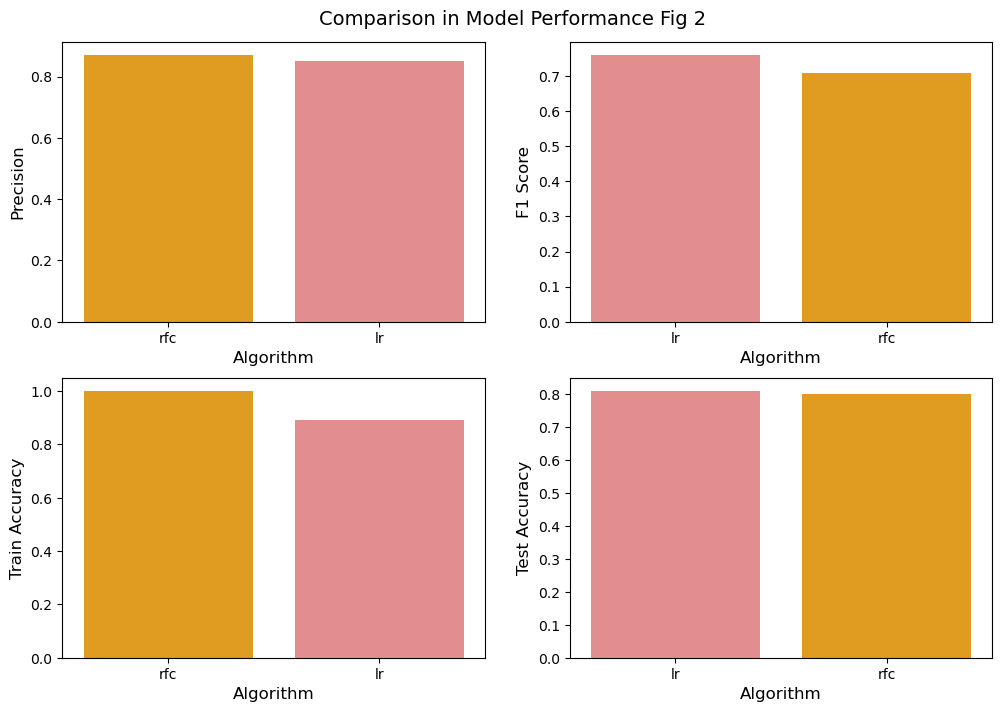

In [74]:
import seaborn as sns
# create a list of metrics
metrics = ['Precision', 'F1 Score', 'Train Accuracy', 'Test Accuracy']

# create the figure
fig = plt.figure(figsize=(12, 8))

# adjust the height of the padding between subplots to avoid overlapping
#plt.subplots_adjust(hspace=0.3)

# set the color palette
colors = {'lr':'lightcoral',
          'mnb':'lightskyblue',
          'rfc':'orange',
          'gbc':'gold',
          'dtc':'limegreen',
          'svc':'royalblue',
          'knc':'dimgray'}

# add a centered suptitle to the figure
plt.suptitle('Comparison in Model Performance Fig 2', fontsize=14, y=0.92)

# generate the histograms in a for loop
for i, metric in enumerate(metrics):
    
    # add a new subplot iteratively
    ax = plt.subplot(2, 2, i+1)
    ax = sns.barplot(x='Algorithm', y=metric, data=scores_df.sort_values(metric, ascending=False), palette=colors)
    
    # set x_label, y_label
    ax.set_xlabel('Algorithm', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    
# show the plots
plt.show()

In [72]:
lr = LogisticRegression(max_iter=10000, random_state=random_state)
lr.fit(X_train , y_train)

LogisticRegression(max_iter=10000, random_state=1000)

In [76]:
finalpred = lr.predict(X_val)

In [77]:
finalpred = pd.DataFrame(finalpred)

In [78]:
#creating the prediction dataset
submission = test_data[['id']].reset_index(drop=True)
submission['target'] = finalpred

In [79]:
submission.head()

,id,target
0,0,1.0
1,2,0.0
2,3,0.0
3,9,0.0
4,11,0.0


In [81]:
#converting the target column from float to integers
submission['target'] = submission['target'].astype(int)

In [83]:
submission['target'].value_counts()

0.0    1255
1.0     649
Name: target, dtype: int64

Plot showing distribution of predicted disasters from the test data 

<AxesSubplot:>

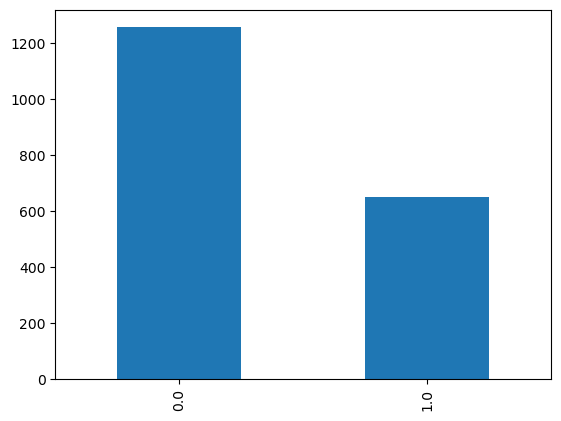

In [84]:
submission['target'].value_counts().plot(kind = 'bar')

Displaying plots of the differences in features employed for both Real Disaster & Non-Disaster

Creating features from the dataset to provide insight to differences between Real disaster Vs Non Disaster tweets. 

In [89]:
#Counting the number of sentences in the text
train_data['sent_count'] = train_data['text'].apply(nltk.tokenize.sent_tokenize).apply(len)
test_data['sent_count'] = test_data['text'].apply(nltk.tokenize.sent_tokenize).apply(len)

In [90]:
#Counting the number of words in the text
train_data['word_count'] = train_data['text'].apply(nltk.tokenize.word_tokenize).apply(len)
test_data['word_count'] = test_data['text'].apply(nltk.tokenize.word_tokenize).apply(len)

In [91]:
#Counting the number of words in the text
train_data['char_count'] = train_data['text'].apply(lambda x: len(x) - x.count(" "))
test_data['char_count'] = test_data['text'].apply(lambda x: len(x) - x.count(" "))

In [93]:
#counting the occurrence of nouns in the text
def noun_count(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('NOUN')

# create a new feature for numbers of non-proper nouns
train_data['noun_count'] = train_data['text'].apply(noun_count)
test_data['noun_count'] = test_data['text'].apply(noun_count)

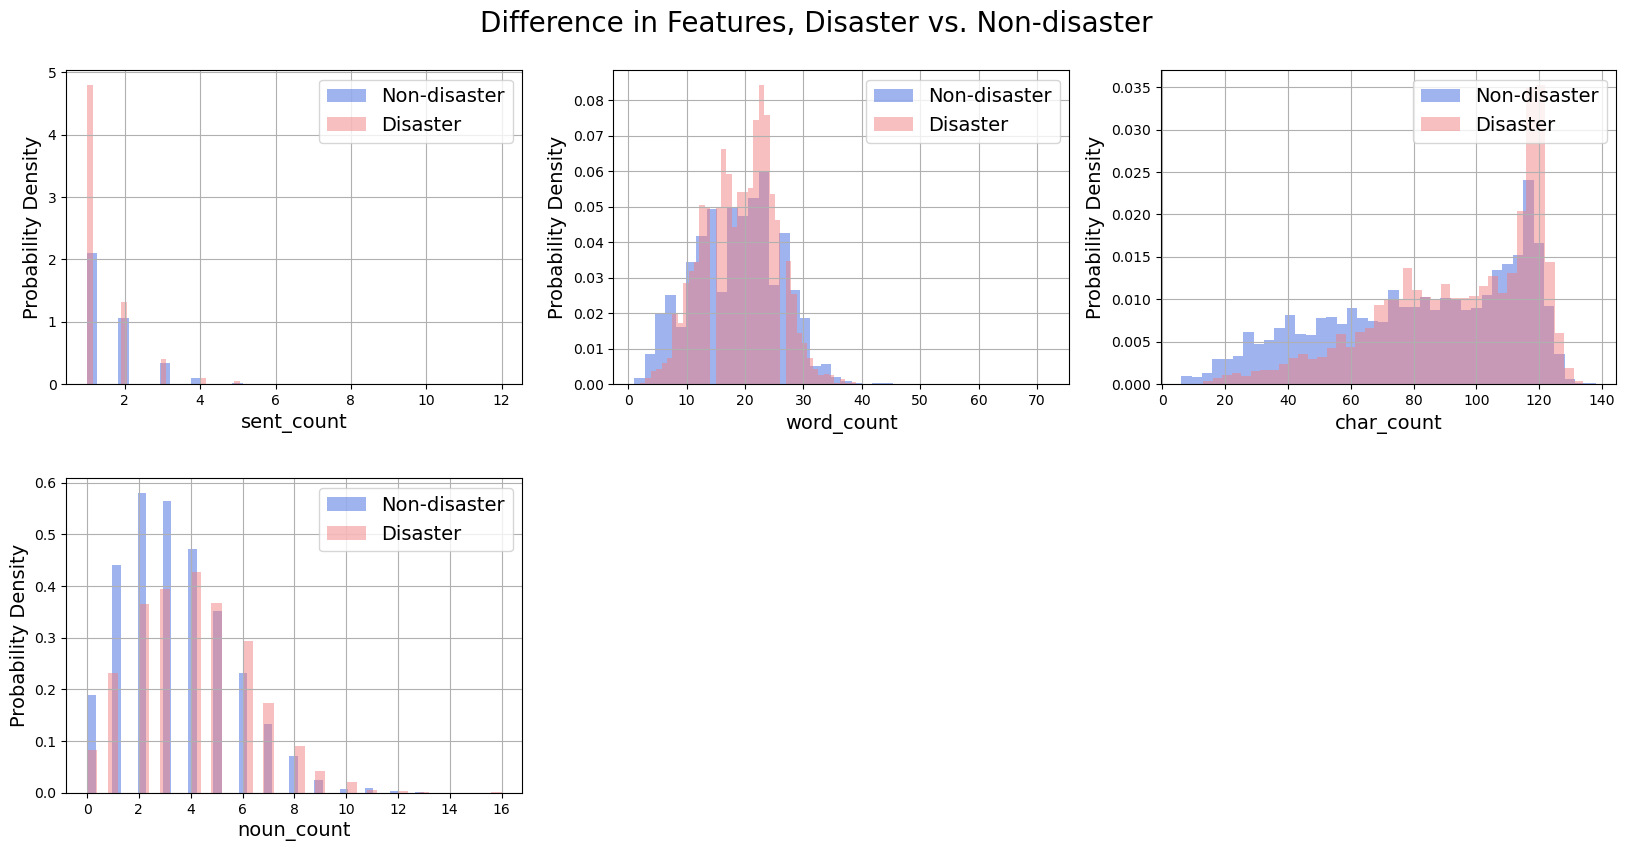

In [97]:
features = ['sent_count', 'word_count', 'char_count', 'noun_count']

fig = plt.figure(figsize=(20, 20))

plt.subplots_adjust(hspace=0.3)

# add a centered suptitle to the figure
plt.suptitle("Difference in Features, Disaster vs. Non-disaster", fontsize=20, y=0.91)

# generating the histograms in a for loop
for i, feature in enumerate(features):
     # add a new subplot iteratively
    ax = plt.subplot(4, 3, i+1)
    ax = train_data[train_data['target']==0][feature].hist(alpha=0.5, label='Non-disaster', bins=40, color='royalblue', density=True)
    ax = train_data[train_data['target']==1][feature].hist(alpha=0.5, label='Disaster', bins=40, color='lightcoral', density=True)
    
    # set x_label, y_label, and legend
    ax.set_xlabel(features[i], fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.legend(loc='upper right', fontsize=14)
    

# shot the figure
plt.show()

### Findings
1. As seen the `Fig 2` above RandomForestClassifier provided the highest `accuracy`, however the best decision is to utilize the `F1 Score` has it gives a more robust evaluation of the model especially in occurrence of imbalanced dataset.

2. 34% of the tweets from test data were correctly classified as tweets relating to real disasters.

3. The `Difference in Features` figure shows the following;

    1. Tweets about disasters contained more sentences than non-disasters
    2. More nominal(nouns) words were used when tweeting about non-disasters

4. The `location` plot informs that majority of the tweets originate from the United States of America

5. The `wordcloud` highlights the frequent words tweeted about real disasters as:

    1. Fire
    2. Flood
    3. Storm
    4. death

### Recommendations

1. A tweet disaster monitoring tool should be developed and deployed to foster access to **real-time** information on disasters. 

2. The **ratio** of tweet occurrence of real disaster to non-disaster is approximately **1:2**, hence more resources should be deployed to ensure proper monitoring enabling rendering of swift response.

3. Count of Sentences in a tweet is pivotal in ascertaining if a tweet relates to a real disaster or otherwise. Therefore it should be included in the monitoring tool.

4. The wordcloud is also an important tool that informs quick decision making.

## End